## Q1. Principle Component Analysis for Data Compression
reference: https://www.askpython.com/python/examples/principal-component-analysis<br>
In our lecture, we have discussed about Principle Component Analysis (PCA), which can be used in
multiple different applications, like data projection for dimensionality reduction. Here we will use PCA for
image compression and reconstruction. Below is a picture for the Natural Park of Montseny. Can you use
PCA to extract the components of the image and reconstruct the image with the first 100 components, 200,
300 components or even more? And also make a plot for accumulative variance (y-axis) with the number
of principle components (x-axis). (You need to implement by yourself, not calling a function.)

### Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import warnings
warnings.filterwarnings("ignore")

### PCA function
<code>Input-
X: 2d matrix with columns as features and rows as instances
n_components: dimension to reduce onto which should be not greater than X.shape[1]
info: Print shapes of eigenvalues and eigenvecters for inspection(default=True)
Output-
2D matrix with shape X.shape[0] X n_components
</code>

In [ ]:
def pca(X, n_components, info=True):
    # # if n_components>X.shape[1]:
    # #     print('n_components should be no more than {}'.format(X.shape[1]))
    # #     return
    # # print(X)
    # # shapes = tuple(X.shape)
    # # print(shapes)
    # # X = X.flatten()
    
# subtract from mean to standardize, here mean is a vector 1 mean for each column/attribute (bring data elements close to 0)
    mean = np.mean(X, axis=0)
    X = X - mean
    # # X = X.reshape(shapes)
    # # print(X)
    
# Get covaraince matrix from the original data
    cov_mat = np.cov(X , rowvar = False)
    if info: print('---> Computing Eigenvalues, Eigenvectors...')
    
# Calculate eigenvalue and eigenectors from the covariance matrix
    eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
    
# Sort eigenvectors based on sorted eigenvalues descending order
    sorted_index = np.argsort(eigen_values)[::-1]
    eva = eigen_values[sorted_index]
    
# Each column represents Principal Component, so sort all row value
    eve = eigen_vectors[:,sorted_index]
    
    if info: print('Eigen Values: ', eva.shape)
    if info: print('Eigen Vectors: ', eve.shape)
    
# Consider only first n eigenvectors for 
    n_eve = eve[:,0:n_components].T
    
# Transform the given matrix onto new space of reduced n dimensions
    if info: print('--->Transforming...')
# matrix multiplication(tranformation)
    X_ndim = np.dot(n_eve,X.T)
    X_ndim = X_ndim.T
    
    if info: print('Eigen Vector.T Shape: ', eve.T.shape)
    if info: print('Original.T Shape: ', X.T.shape)
    if info: print('Reduced Shape: ', X_ndim.shape)
    
# Return transformed data, eigenvalues matrix, eigenvectors matrix, mean(which will be added later)
    # # X_ndim = X_ndim+mean
    return X_ndim, eva, eve, mean

---> Computing Eigenvalues, Eigenvectors...
Eigen Values:  (2,)
Eigen Vectors:  (2, 2)
--->Transforming...
Eigen Vector.T Shape:  (2, 2)
Original.T Shape:  (2, 4)
Reduced Shape:  (4, 2)


Text(0.5, 1.0, 'Tranfroemd Data')

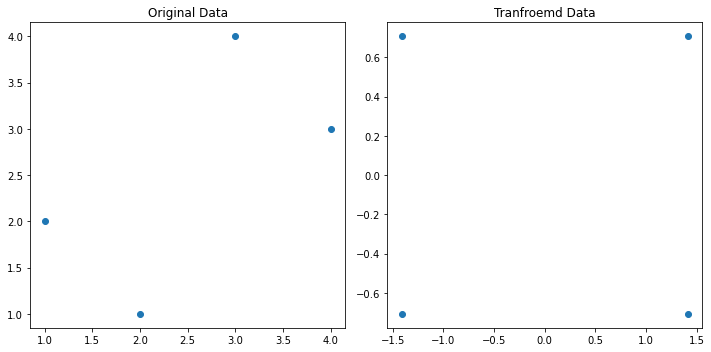

In [ ]:
# test if the PCA is working correctly

X = np.array([[1.0,2.0], [2.0,1.0], [3.0,4.0], [4.0, 3.0]])
df = pd.DataFrame(X, columns = ['x','y'])
X_ndim,x,x,x = pca(X, n_components=2)
df_pca = pd.DataFrame(X_ndim, columns = ['x','y'])
fig, ax = plt.subplots(1,2, figsize=(10,5), layout='tight')
ax[0].scatter(df.x,df.y)
ax[0].set_title('Original Data')
ax[1].scatter(df_pca.x,df_pca.y)
ax[1].set_title('Tranfroemd Data')

### PCA for image function
<code>Input-
path: path to 3 channel image
n_components: dimension to reduce onto which should be not greater than X.shape[1]
info: Print details of the processes(default=True)
Output-
arr: compressed and inverse transformed image(for visualization purposes)
results: a dictionary with eigenvalues and eigenvectors which will be used to plot variance lots later
</code>

In [ ]:
def pca_img(path, n_components, info=True):
    # # img = Image.open(path)
    # # decomp = img.split()
    # # r,g,b = np.array(decomp[0]),np.array(decomp[1]),np.array(decomp[2])
    image = cv2.imread("img.jpeg")
    (b,g,r) = cv2.split(image)
    
# Scale from 0-255 to 0-1 (to make calculations easy)
    b = b/255
    g = g/255
    r = r/255
    
# Results will store eigenvalues and eigenvectors for each band seperately(to plot variance)
    results = {}
    
# Apply pca
    if info: print('----------R band----------')
    r_reduced, eva, eve, mean = pca(r, n_components=n_components, info=info)
    # # print(mean.shape)
    # # print(mean[:5])
    # # print(r_reduced[:5])
    # # r_reduced=r_reduced+np.mean(mean)
# Append eigenvalue(eva) and eigenvectors(eve) into results as a dictionary
    results['r']=dict(eva=eva,eve=eve)
    
# Transform the reduced dimention matrix into original shape to visualize it(inverse transform)
    r_inv_transformed = np.dot(eve[:,:n_components],r_reduced.transpose()).transpose()
    if info: print('R Inverse Transformed Shape: ', r_inv_transformed.shape)
    # # print(r_inv_transformed[:5])
    
    # Add mean to the inverse tranformed image(this is to convert image back to how it was looking)
    r_inv_transformed = r_inv_transformed+mean
    # # print(r_inv_transformed[:5])
    
# same proces for G and B bands as R band
    if info: print('\n----------G band----------')
    g_reduced, eva, eve, mean = pca(g, n_components=n_components, info=info)
    # g_reduced+=np.mean(mean)
    results['g']=dict(eva=eva,eve=eve)
    g_inv_transformed = np.dot(eve[:,:n_components],g_reduced.transpose()).transpose()
    if info: print('G Inverse Transformed Shape: ', r_inv_transformed.shape)
    g_inv_transformed = g_inv_transformed+mean
    
    if info: print('\n----------B band----------')
    b_reduced, eva, eve, mean = pca(b, n_components=n_components, info=info)
    # # b_reduced+=np.mean(mean)
    results['b']=dict(eva=eva,eve=eve)
    b_inv_transformed = np.dot(eve[:,:n_components],b_reduced.transpose()).transpose()
    if info: print('B Inverse Transformed Shape: ', r_inv_transformed.shape)
    b_inv_transformed = b_inv_transformed+mean
    
# plot individual bands before and after compression
    if info:
        fig, ax = plt.subplots(2,3, figsize=(18,10), layout='tight')
        ax[0,0].imshow(r)
        ax[0,0].set_title('R band')
        ax[0,1].imshow(g)
        ax[0,1].set_title('G band')
        ax[0,2].imshow(b)
        ax[0,2].set_title('B band')

        ax[1,0].imshow(r_inv_transformed)
        ax[1,0].set_title('compressed R band')
        ax[1,1].imshow(g_inv_transformed)
        ax[1,1].set_title('compressed G band')
        ax[1,2].imshow(b_inv_transformed)
        ax[1,2].set_title('compressed B band')
        plt.show()
    
# merge individual bands to return a RGB image
    arr = cv2.merge([r_inv_transformed, g_inv_transformed, b_inv_transformed])
    
    return arr, results
    # # rgb = np.concatenate((r_inv_transformed, g_inv_transformed, b_inv_transformed),axis=1) 
    # # plt.imshow(rgb)

----------R band----------
---> Computing Eigenvalues, Eigenvectors...
Eigen Values:  (768,)
Eigen Vectors:  (768, 768)
--->Transforming...
Eigen Vector.T Shape:  (768, 768)
Original.T Shape:  (768, 432)
Reduced Shape:  (432, 100)
R Inverse Transformed Shape:  (432, 768)

----------G band----------
---> Computing Eigenvalues, Eigenvectors...
Eigen Values:  (768,)
Eigen Vectors:  (768, 768)
--->Transforming...
Eigen Vector.T Shape:  (768, 768)
Original.T Shape:  (768, 432)
Reduced Shape:  (432, 100)
G Inverse Transformed Shape:  (432, 768)

----------B band----------
---> Computing Eigenvalues, Eigenvectors...
Eigen Values:  (768,)
Eigen Vectors:  (768, 768)
--->Transforming...
Eigen Vector.T Shape:  (768, 768)
Original.T Shape:  (768, 432)
Reduced Shape:  (432, 100)
B Inverse Transformed Shape:  (432, 768)


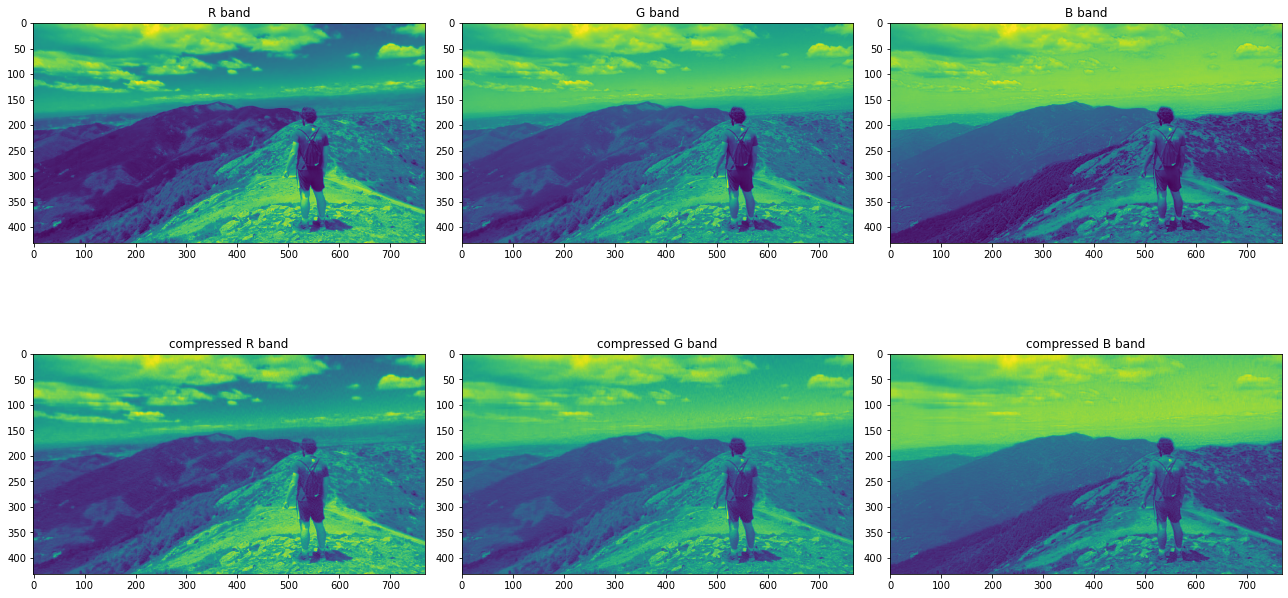

In [ ]:
img, results = pca_img('img.jpeg', n_components=100)

In [ ]:
# function to return array consisting of variance per pc given an array of eigenvalues

def variance(array):
    total = array.sum()
    return array/total

### Plot the compressed image and cumulative variance, variance bar plot
loop over different n_components and plot the compressed image and variance plots

In [ ]:
image = cv2.imread("img.jpeg")
image.shape

(432, 768, 3)

In [ ]:
n=768
img, results = pca_img('img.jpeg', n_components=n, info=False)
avg = (results['r']['eva']+results['g']['eva']+results['b']['eva'])/3
variances = variance(avg)[:n]*100
for i,val in enumerate(np.cumsum(variances)):
    if val>=95:
        print('no of PCs capturing 95% of variance:',i)
        break

no of PCs capturing 95% of variance: 18


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

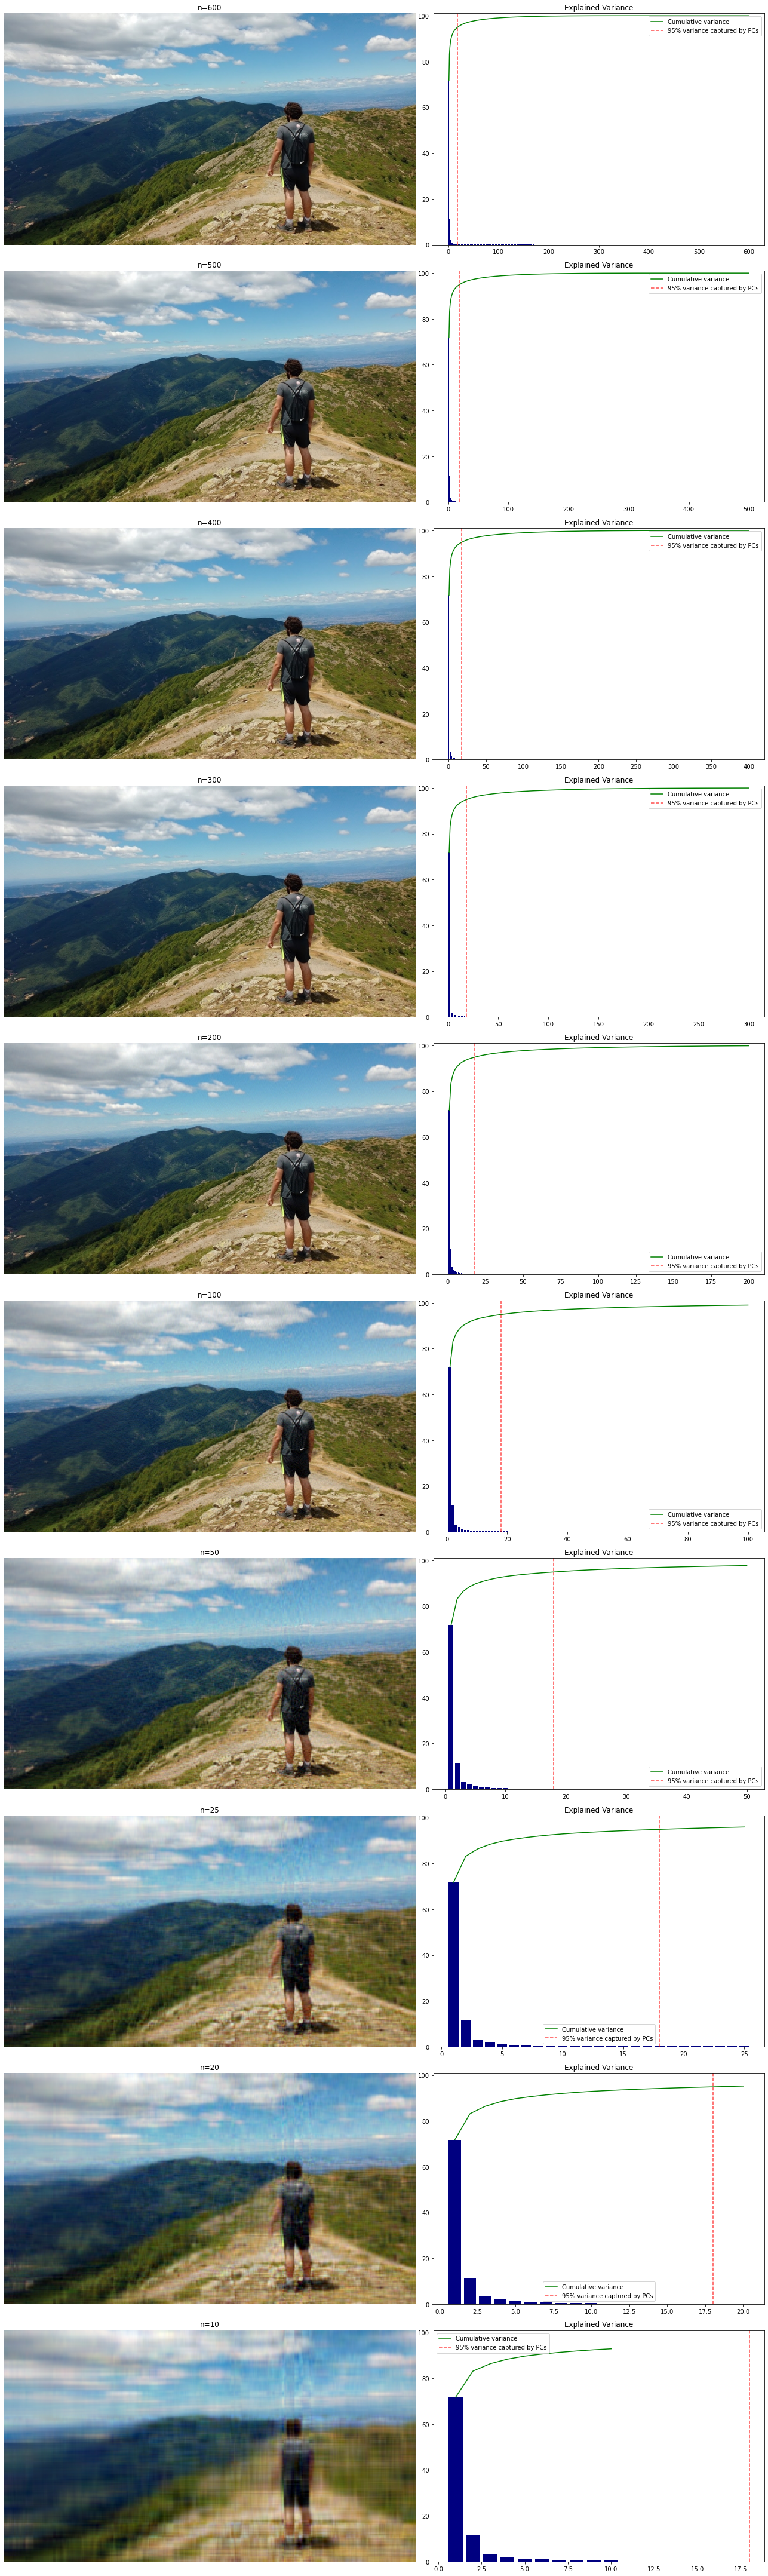

In [ ]:
ns = [600,500,400,300,200,100,50,25,20,10]
# ns = [25,20]
path = 'img.jpeg'
fig, ax = plt.subplots(len(ns),2, figsize=(18,6*len(ns)), layout='tight', gridspec_kw={
                           'width_ratios': [1.25, 1]})
for i,n in enumerate(ns):
    img, results = pca_img(path, n_components=n, info=False)
    # # print(results['r']['eva'].shape)
    # # print(results['g']['eva'].shape)
    # # print(results['b']['eva'].shape)
    
# Calculate average variance from variances of the individual bands
    avg = (results['r']['eva']+results['g']['eva']+results['b']['eva'])/3
# Convert variances into range[0-100] from [0-1]
    variances = variance(avg)[:n]*100
    # # print(variances.shape)
    # # print(avg.shape)
    
# Plot the compressed and transformed image
    ax[i,0].imshow(img)
    # ax[i,0].imshow((img*255).astype(np.uint8))
    ax[i,0].set_title('n='+str(n))
    ax[i,0].axis('off')
    # # for i,val in enumerate(np.cumsum(variances)):
    # # if val>=95:
    # #     print('no of PCs capturing 95% of variance:',i)
    # #     break
    
# Plot the accumulative varaince
    ax[i,1].set_ylim([0,101])
    # # ax[i,1].set_xticks(np.arange(1, n+1, 3))
    ax[i,1].bar(range(1, n+1), variances, color='navy')
    ax[i,1].plot(range(1, n+1), np.cumsum(variances), color='green', label='Cumulative variance')
    # # ax[i,1].axhline(y=95, color='green', alpha=0.5, label='95% variance')
    ax[i,1].axvline(x=18, color='red', ls='--', alpha=0.7, label='95% variance captured by PCs')
    ax[i,1].set_title('Explained Variance')
    ax[i,1].legend()
    
plt.show()

#### From the above plots we can see that, more than 95% of the total variance is captured by first 18 Principal components, the same can be visualized better when we plot variance for lower principal components

### <hr> The below plot is to plot variance plots for individual bands(r,g,b) while the above plot averages the variance in all 3 bands

For n= 500


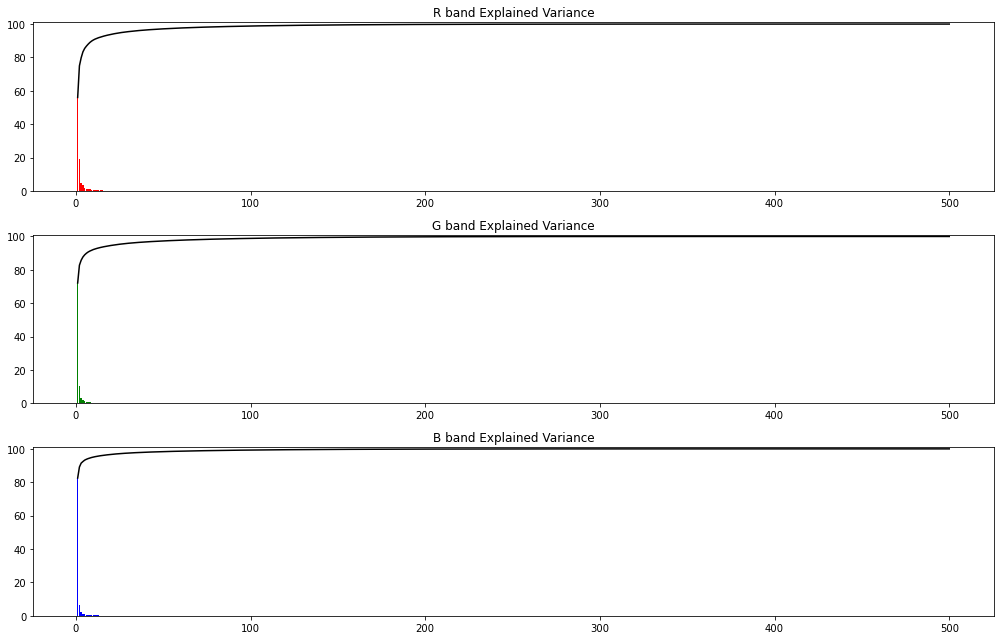

In [ ]:
n=500
path = 'img.jpeg'
# fig, ax = plt.subplots(3*len(ns),1, figsize=(14,9*len(ns)), layout='tight', sharey=True)
img, results = pca_img(path, n_components=n, info=False)
# print(results['r']['eva'].shape)
# print(results['g']['eva'].shape)
# print(results['b']['eva'].shape)
r_results = results['r']['eva']
g_results = results['g']['eva']
b_results = results['b']['eva']
r_variances = variance(r_results)[:n]*100
g_variances = variance(g_results)[:n]*100
b_variances = variance(b_results)[:n]*100


# fig, ax = plt.subplots(figsize=(16,12))
# ax.set_ylim([0,101])
# # ax[i,1].set_xticks(np.arange(1, n+1, 3))
# ax.bar(range(1, n+1), r_variances, color='red')
# ax.plot(range(1, n+1), np.cumsum(r_variances), color='red', label='Cumulative variance')
# ax.bar(range(1, n+1), g_variances, color='green')
# ax.plot(range(1, n+1), np.cumsum(g_variances), color='green', label='Cumulative variance')
# ax.bar(range(1, n+1), b_variances, color='blue')
# ax.plot(range(1, n+1), np.cumsum(b_variances), color='blue', label='Cumulative variance')
# ax.set_title('Explained Variance')

# Plot for variances for individal bands
print(f'For n= {n}')
fig, ax = plt.subplots(3,1,figsize=(14,9), layout='tight', sharey=True)

ax[0].set_ylim([0,101])
# ax[i,1].set_xticks(np.arange(1, n+1, 3))
ax[0].bar(range(1, n+1), r_variances, color='red')
ax[0].plot(range(1, n+1), np.cumsum(r_variances), color='black', label='Cumulative variance')
ax[0].set_title('R band Explained Variance')

ax[1].set_ylim([0,101])
# ax[i,1].set_xticks(np.arange(1, n+1, 3))
ax[1].bar(range(1, n+1), g_variances, color='green')
ax[1].plot(range(1, n+1), np.cumsum(g_variances), color='black', label='Cumulative variance')
ax[1].set_title('G band Explained Variance')

ax[2].set_ylim([0,101])
# ax[i,1].set_xticks(np.arange(1, n+1, 3))
ax[2].bar(range(1, n+1), b_variances, color='blue')
ax[2].plot(range(1, n+1), np.cumsum(b_variances), color='black', label='Cumulative variance')
ax[2].set_title('B band Explained Variance')
plt.show()

### Reducing the no of components to visualize the variances plot better

For n= 40


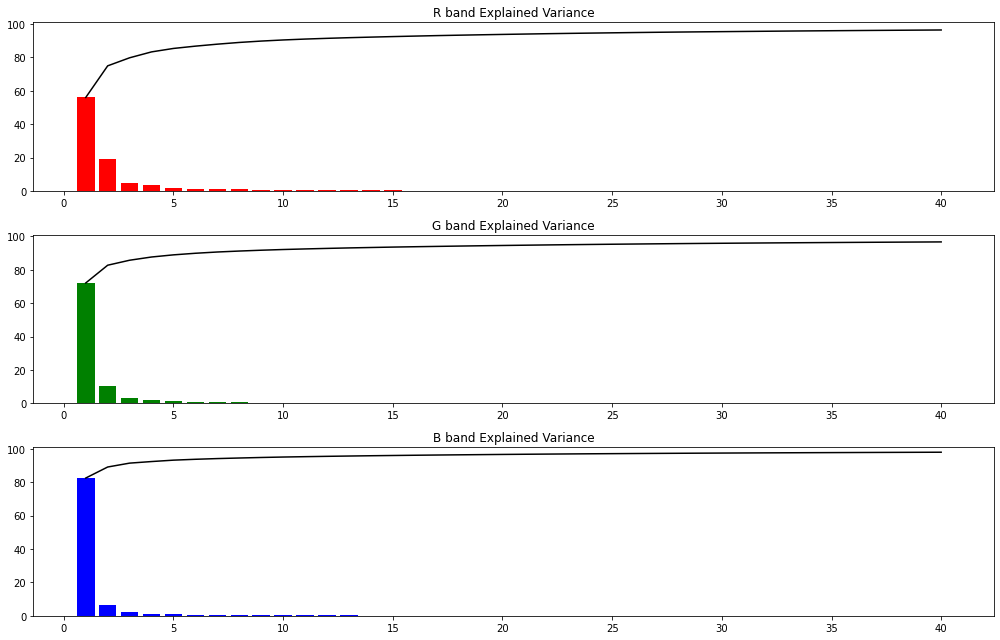

In [ ]:
n=40
img, results = pca_img(path, n_components=n, info=False)
r_results = results['r']['eva']
g_results = results['g']['eva']
b_results = results['b']['eva']
r_variances = variance(r_results)[:n]*100
g_variances = variance(g_results)[:n]*100
b_variances = variance(b_results)[:n]*100

print(f'For n= {n}')
fig, ax = plt.subplots(3,1,figsize=(14,9), layout='tight', sharey=True)

ax[0].set_ylim([0,101])
# ax[i,1].set_xticks(np.arange(1, n+1, 3))
ax[0].bar(range(1, n+1), r_variances, color='red')
ax[0].plot(range(1, n+1), np.cumsum(r_variances), color='black', label='Cumulative variance')
ax[0].set_title('R band Explained Variance')

ax[1].set_ylim([0,101])
# ax[i,1].set_xticks(np.arange(1, n+1, 3))
ax[1].bar(range(1, n+1), g_variances, color='green')
ax[1].plot(range(1, n+1), np.cumsum(g_variances), color='black', label='Cumulative variance')
ax[1].set_title('G band Explained Variance')

ax[2].set_ylim([0,101])
# ax[i,1].set_xticks(np.arange(1, n+1, 3))
ax[2].bar(range(1, n+1), b_variances, color='blue')
ax[2].plot(range(1, n+1), np.cumsum(b_variances), color='black', label='Cumulative variance')
ax[2].set_title('B band Explained Variance')
plt.show()

#### Hence, we can see that the image is very much compressable, using 18 Principal Components, we can see that the iamge looks similar to the original image with some noise. And if we reduce the dimensions to 100, the image looks alike to the original image. Hence we can reconstruct the original image by reducing the dimensions to 300,200,100, etc.

## Question - 2

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df_us = pd.read_csv('us.txt',sep='/n',header=None, names=["Name"])
df_greek = pd.read_csv('greek.txt',sep='/n',header=None, names=["Name"])
df_japan = pd.read_csv('japan.txt',sep='/n',header=None, names=["Name"])
df_arabic = pd.read_csv('arabic.txt',sep='/n',header=None, names=["Name"])

In [ ]:
df_us = df_us.assign(Country='US')
df_greek = df_greek.assign(Country='Greek')
df_japan = df_japan.assign(Country='Japan')
df_arabic = df_arabic.assign(Country='Arabic')

In [ ]:
df = pd.concat([df_us, df_greek, df_japan, df_arabic])

In [ ]:
df.shape

(4000, 2)

In [ ]:
df.isnull().sum()

Name       0
Country    0
dtype: int64

In [ ]:
df.head()

Name Country
0     Timothy Moses      US
1      Anna Barajas      US
2    James Caldwell      US
3  Mr. Michael Cole      US
4   Jeffrey Collier      US

#### Train-test Split

In [ ]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df,test_size=0.3, stratify=df['Country'], shuffle=True)

#### Count Vectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
count_vector = CountVectorizer()
X_train_df = count_vector.fit_transform(train_df['Name'])
X_train_df.shape

(2800, 2524)

In [ ]:
data_transform = count_vector.transform(train_df['Name'])

In [ ]:
count_array = data_transform.toarray()
df = pd.DataFrame(data=count_array,columns = count_vector.get_feature_names()).reset_index(drop = True)

In [ ]:
train_df = train_df.reset_index(drop=True)

In [ ]:
clean_train_df = pd.concat([train_df, df], axis=1)
clean_train_df.head()

Name Country  aaron  abbott  adam  adams  aguilar  \
0     Αγησίλαος Τσιαμούρας   Greek      0       0     0      0        0   
1            Mikayla Brown      US      0       0     0      0        0   
2  الدكتورة ميرال بني عطية  Arabic      0       0     0      0        0   
3         Αλέξιος Πετράκης   Greek      0       0     0      0        0   
4             كنار بنو كلب  Arabic      0       0     0      0        0   

   aimee  alex  alexander  ...  遠藤  里佳  鈴木  長谷川  阿部  陽一  陽子  青木  香織  高橋  
0      0     0          0  ...   0   0   0    0   0   0   0   0   0   0  
1      0     0          0  ...   0   0   0    0   0   0   0   0   0   0  
2      0     0          0  ...   0   0   0    0   0   0   0   0   0   0  
3      0     0          0  ...   0   0   0    0   0   0   0   0   0   0  
4      0     0          0  ...   0   0   0    0   0   0   0   0   0   0  

[5 rows x 2526 columns]

In [ ]:
train_df['Name'] = train_df['Name'].str.lower()

In [ ]:
#Creating a matrix in which unique word presented by a column of the matrix and each sample is the row.
train_df['Name'] = train_df['Name'].str.split()

lexicon = []
for names in train_df['Name']:
    print(names)
    for name in names:
        lexicon.append(name)

lexicon = list(set(lexicon))

['αγησίλαος', 'τσιαμούρας']
['mikayla', 'brown']
['الدكتورة', 'ميرال', 'بني', 'عطية']
['αλέξιος', 'πετράκης']
['كنار', 'بنو', 'كلب']
['加藤', '桃子']
['ευθαλία', 'παλαιολογοπούλου']
['الدكتورة', 'اصيل', 'النمر']
['رباح', 'باهلة']
['林', '千代']
['δαμασκηνός', 'σεφέκος']
['melissa', 'quinn']
['samuel', 'ponce', 'ii']
['الأستاذة', 'أحمد', 'اهرام']
['吉田', '京助']
['diane', 'arnold']
['αίας', 'γάτος']
['ερμής', 'κατσίπης']
['林', '亮介']
['鈴木', '淳']
['περσεφόνη', 'κάκκα']
['andrea', 'henry']
['تمّام', 'العارف']
['الدكتور', 'مجد', 'القرجولي']
['السيدة', 'آيات', 'الزرقان']
['الأستاذة', 'لوجين', 'عسير']
['ειρήνη-εύα', 'γούλα']
['فخر', 'الدّين', 'القرجولي']
['mark', 'garcia']
['grant', 'jones']
['danielle', 'hoffman']
['μαγδαληνή', 'παπανδρέου']
['βαλέρια', 'σαριδάκη']
['斎藤', '京助']
['τζανέτος', 'κουκουβίνος']
['πολύμνια', 'μπαλλή']
['鈴木', '千代']
['藤井', '康弘']
['ريما', 'قبيلة', 'هذيل', 'البقوم']
['πολυζώης-λογοθέτης', 'μανιώτης']
['χρυσοβαλάντω', 'κίτσου']
['小林', '直人']
['渡辺', '太郎']
['السيد', 'فتوح', 'الكلغاص

#### Naive Bayes Algorithm

In [ ]:
greek = clean_train_df[clean_train_df['Country'] == 'Greek']
arabic = clean_train_df[clean_train_df['Country'] == 'Arabic']
us = clean_train_df[clean_train_df['Country'] == 'US']
japan = clean_train_df[clean_train_df['Country'] == 'Japan']

In [ ]:
#Calculating Prior Probabilities
p_arb = len(arabic) / len(clean_train_df)
p_us = len(us) / len(clean_train_df)
p_jp = len(japan) / len(clean_train_df)
p_grk = len(greek) / len(clean_train_df)

In [ ]:
wpa = arabic['Name'].apply(len)
n_arabic = wpa.sum()

wpu = us['Name'].apply(len)
n_us = wpu.sum()

wpj = japan['Name'].apply(len)
n_japan = wpj.sum()

wpg = greek['Name'].apply(len)
n_greek = wpg.sum()

alpha = 1
n_lexicon = len(lexicon)

In [ ]:
#Calculating Posterior Probabilities
param_arabic = {unique_word:0 for unique_word in lexicon}
param_us = {unique_word:0 for unique_word in lexicon}
param_japan = {unique_word:0 for unique_word in lexicon}
param_greek = {unique_word:0 for unique_word in lexicon}


In [ ]:
for word in lexicon:
    if word in greek:
        n_g = greek[word].sum() 
        p_word_given_greek = (n_g + alpha) / (n_greek + alpha*n_lexicon)
        param_greek[word] = p_word_given_greek
    if word in us:
        n_u = us[word].sum() 
        p_word_given_us = (n_u + alpha) / (n_us + alpha*n_lexicon)
        param_us[word] = p_word_given_us
    if word in japan:
        n_j = japan[word].sum() 
        p_word_given_japan = (n_j + alpha) / (n_japan + alpha*n_lexicon)
        param_japan[word] = p_word_given_japan
    if word in arabic:

        n_a = arabic[word].sum()
        p_word_given_arabic = (n_a + alpha) / (n_arabic + alpha*n_lexicon)
        param_arabic[word] = p_word_given_arabic

In [ ]:
def naive_bayes_classifier(names):
    names = names.lower().split()

    p_arabic_names = p_arb
    p_greek_names = p_grk
    p_japan_names = p_jp
    p_us_names = p_us
    
    result = {}
    for word in names:
        if word in param_arabic:
            p_arabic_names *= param_arabic[word]

        if word in param_us:
            p_us_names *= param_us[word]
            
        if word in param_japan:
            p_japan_names *= param_japan[word]
 
        if word in param_greek:
            p_greek_names *= param_greek[word]

    result['Arabic'] =  p_arabic_names
    result['US'] =  p_us_names
    result['Japan'] =  p_japan_names
    result['Greek'] =  p_greek_names

    max_value = 0
    names_class = ''
    
    for name in result:
        if result[name] > max_value:
            max_value = result[name]
            names_class = name

    return names_class

In [ ]:
test_df['predicted'] = test_df['Name'].apply(naive_bayes_classifier)
test_df.head()

Name Country predicted
227  Κρυστάλλης Φουτσιτζής   Greek    Arabic
207           بهية الشهابي  Arabic    Arabic
67                   山下 京助   Japan     Japan
659         Heather Davies      US        US
571  Θεοτόκης Γκουτζαμάνης   Greek     Japan

In [ ]:
def calculate_accuracy(data):
    correct = 0
    total = data.shape[0]

    for row in data.iterrows():
        row = row[1]
        if row['Country'] == row['predicted']:
            correct += 1


    return correct/total

In [ ]:
print(f"Test accuracy is {calculate_accuracy(test_df)*100}")

Test accuracy is 71.0
